# Checkout the dataset
Dataset: [bbc dataset][def]  

我們可以從下方圖表得知：  
* 此資料集有五種類別，即是等等 BERT 判斷分類的 Label  
* 而每筆 Text 就是 BERT 的 input 資料

目的就是判斷此 Text 的類別 (Label) 是什麼  

[def]: https://www.kaggle.com/datasets/sainijagjit/bbc-dataset

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

datapath = 'bbc-text.csv'
df = pd.read_csv(datapath)
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


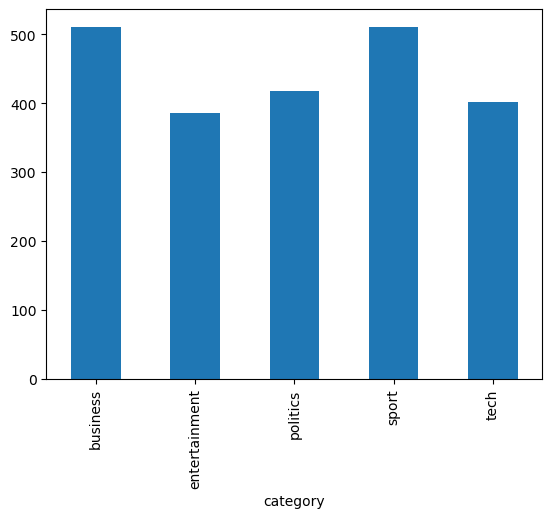

In [10]:
df.groupby(['category']).size().plot.bar()

# Preprocessing Data (資料前處理)

## 1. BertTokenizer
**BertTokenizer**:
以 Word-based 的方式做 Tokenization，並加上 [CLS]、[SEP]、[PAD] 這三個特殊 token


In [15]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

example_text = 'I am practicing using Bert model'
bert_input = tokenizer(example_text,padding='max_length', max_length = 10, 
                       truncation=True, return_tensors="pt")


print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])

Downloading: 100%|██████████| 208k/208k [00:00<00:00, 331kB/s] 
Downloading: 100%|██████████| 29.0/29.0 [00:00<00:00, 29.7kB/s]
Downloading: 100%|██████████| 570/570 [00:00<00:00, 571kB/s]

tensor([[  101,   146,  1821, 13029,  1606, 15035,  2235,   102,     0,     0]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])


In [16]:
example_text = tokenizer.decode(bert_input.input_ids[0])

print(example_text)

[CLS] I am practicing using Bert model [SEP] [PAD] [PAD]
